# Synthetic control with sci-kit learn models

In [1]:
import causalpy as cp

## Load data

In [2]:
df = cp.load_data("sc")
treatment_time = 70

## Analyse with `WeightedProportion` model

In [3]:
result = cp.SyntheticControl(
    df,
    treatment_time,
    control_units=["a", "b", "c", "d", "e", "f", "g"],
    treated_units=["actual"],
    model=cp.skl_models.WeightedProportion(),
)

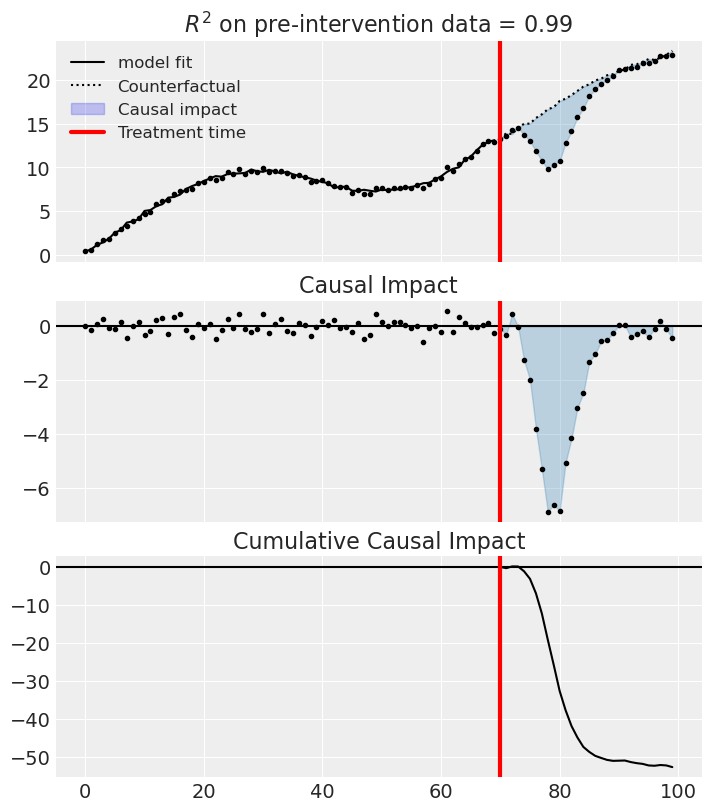

In [4]:
fig, ax = result.plot(plot_predictors=True)

In [5]:
result.summary(round_to=3)

================================SyntheticControl================================
Control units: ['a', 'b', 'c', 'd', 'e', 'f', 'g']
Treated unit: actual
Model coefficients:
  a	     0.319
  b	    0.0597
  c	     0.294
  d	    0.0605
  e	  0.000762
  f	     0.234
  g	    0.0321


## Effect Summary Reporting

For decision-making, you often need a concise summary of the causal effect. The `effect_summary()` method provides a decision-ready report with key statistics.

:::{note}
**OLS vs PyMC Models**: When using OLS models (scikit-learn), the `effect_summary()` provides **confidence intervals** and **p-values** (frequentist inference), rather than the posterior distributions, HDI intervals, and tail probabilities provided by PyMC models (Bayesian inference). OLS tables include: mean, CI_lower, CI_upper, and p_value, but do not include median, tail probabilities (P(effect>0)), or ROPE probabilities.
:::


In [6]:
# Generate effect summary for the full post-period
stats = result.effect_summary()
stats.table

,mean,ci_lower,ci_upper,p_value,relative_mean,relative_ci_lower,relative_ci_upper
average,-1.757497,-2.625051,-0.889943,0.000271,-10.132258,-15.262594,-5.001922
cumulative,-52.724907,-78.751527,-26.698286,0.000271,-303.967744,-457.877827,-150.057661


In [7]:
# View the prose summary
print(stats.text)

Post-period (70 to 99), the average effect was -1.76 (95% CI [-2.63, -0.89]), with a p-value of 0.000. The cumulative effect was -52.72 (95% CI [-78.75, -26.70]); p-value 0.000. Relative to the counterfactual, this equals -10.13% on average (95% CI [-15.26%, -5.00%]).


But we can see that (for this dataset) these estimates are quite bad. So we can lift the "sum to 1" assumption and instead use the `LinearRegression` model, but still constrain weights to be positive. Equally, you could experiment with the `Ridge` model (e.g. `Ridge(positive=True, alpha=100)`).